In [1]:
'''This project aims to analyze the 2024 Stack Overflow Developer Survey to uncover 
insights into developer demographics, compensation, and the factors that influence salary. 
The analysis includes exploratory data visualization, statistical hypothesis testing, and the development 
of a predictive machine learning model.'''

import basic_exploratory_analysis as eda

In [2]:
df, df_scheme = eda.load_and_preprocess()
print (f'Total columns is: {len(df.columns)}')

Total columns is: 114


In [3]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [4]:
df['MainBranch'].value_counts()

MainBranch
Pro         26829
Decent       3495
Wannabe      1730
Noob         1667
GotBored      856
Name: count, dtype: int64

In [5]:
df['Age'].value_counts(), df['Country'].value_counts()

(Age
 3.0    12417
 4.0     8066
 2.0     6983
 5.0     3526
 6.0     1691
 1.0     1338
 7.0      556
 Name: count, dtype: int64,
 Country
 USA            11005
 Germany         4935
 India           4221
 UK              3205
 Ukraine         2670
 France          2106
 Canada          2085
 Poland          1531
 Netherlands     1446
 Brazil          1373
 Name: count, dtype: int64)

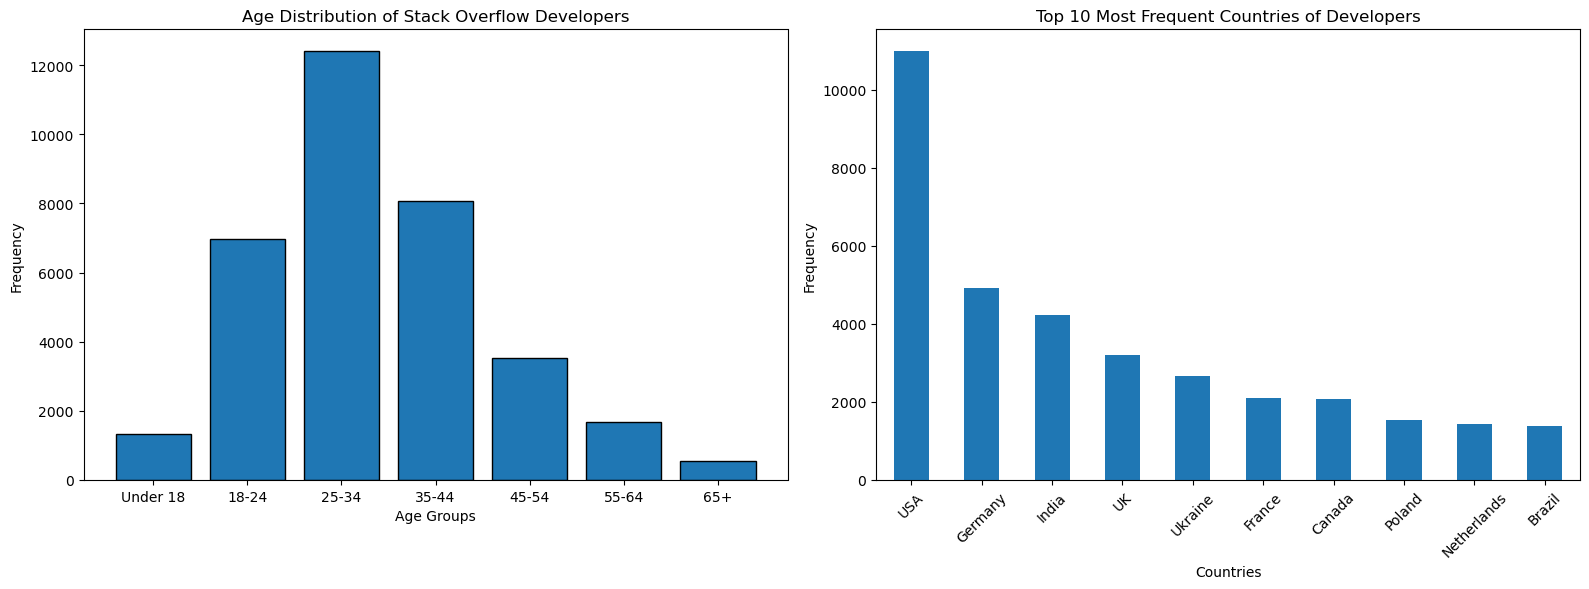

In [6]:
eda.age_country_histogram(df)

In [7]:
# Vastly dominated by early career to mid range devs. USA is the most popular country 

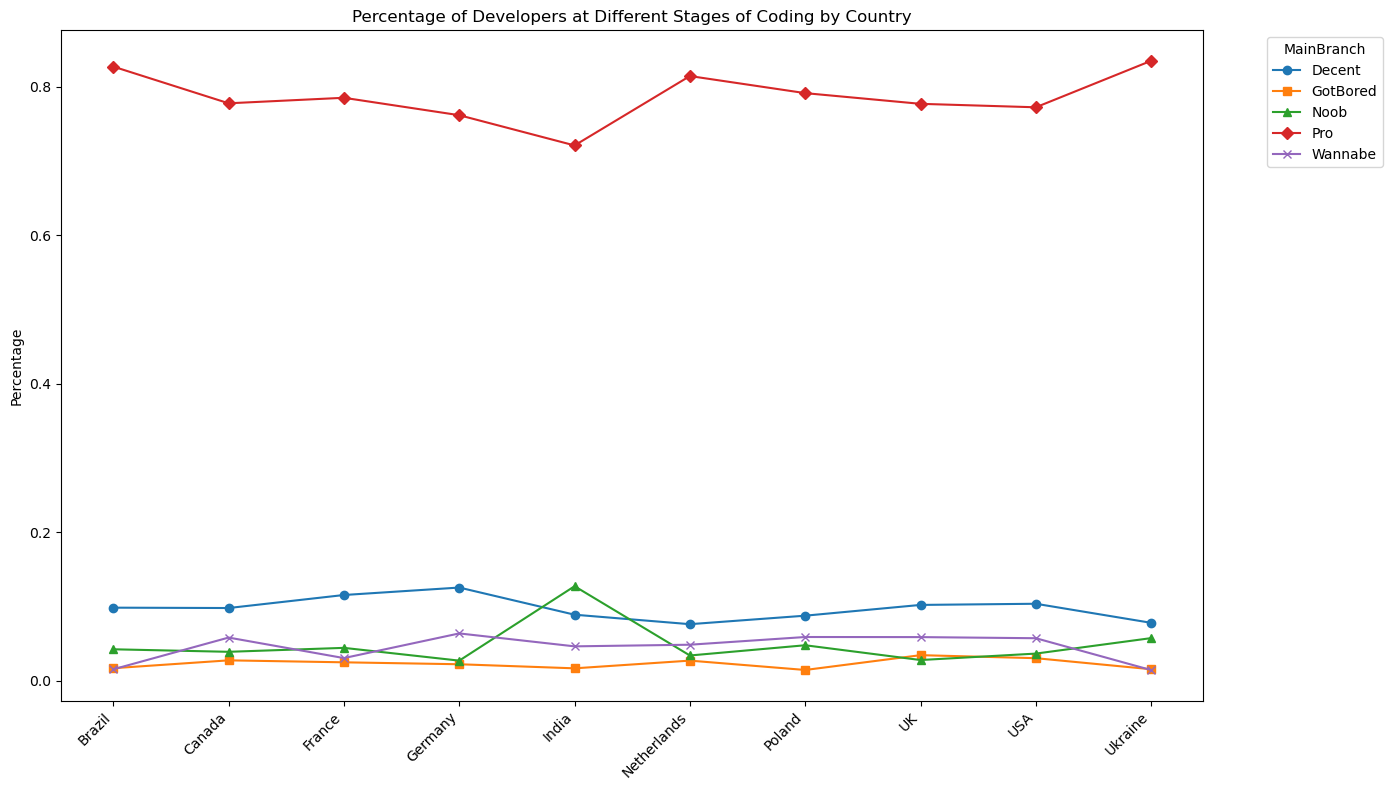

In [8]:
eda.plot_experience_vs_country(df)

In [9]:
# Nothing too crazy here. Pros vastly dominate. India has significatly higher percent younger (Noob) devs compared to rest
# of the top 10 countries. Consequently a lower percent of pros

/home/anirban/stackoverflow_project/basic_exploratory_analysis.py:157: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_labels)


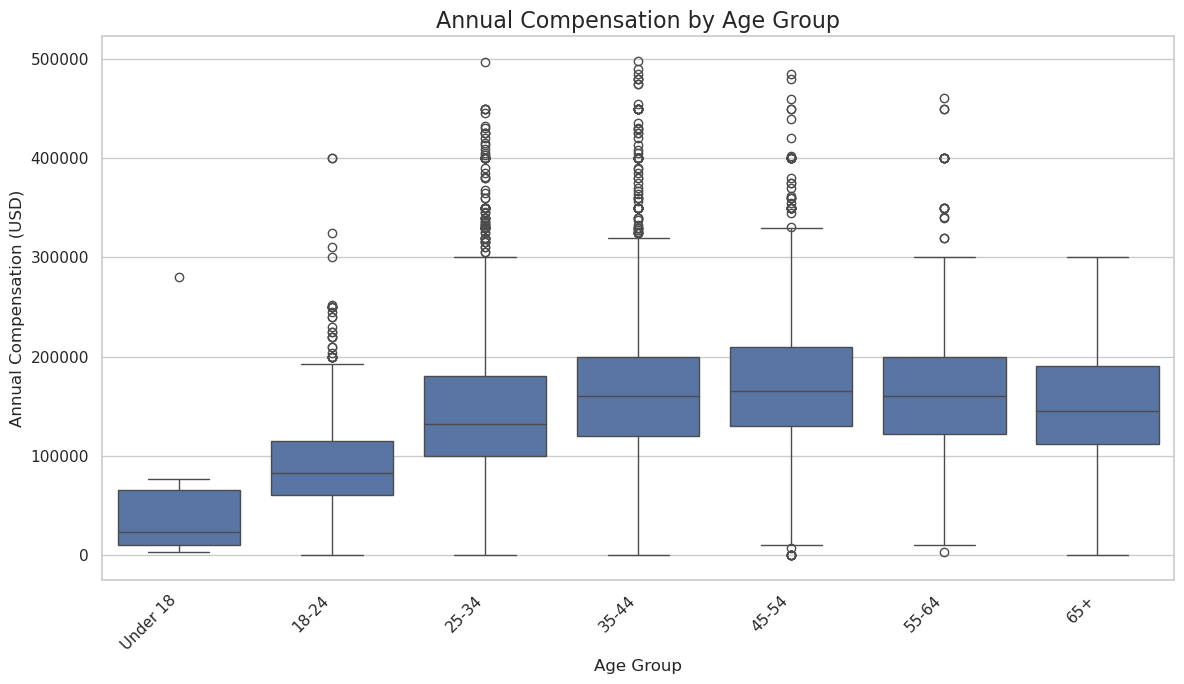

In [10]:
eda.plot_country_age_vs_salary(df, country_name = 'USA')

/home/anirban/stackoverflow_project/statistical_tests.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.errorbar(x=j, y=salary_df.iloc[j][1], yerr=salary_df.iloc[j][2], fmt='k.', markersize=15)


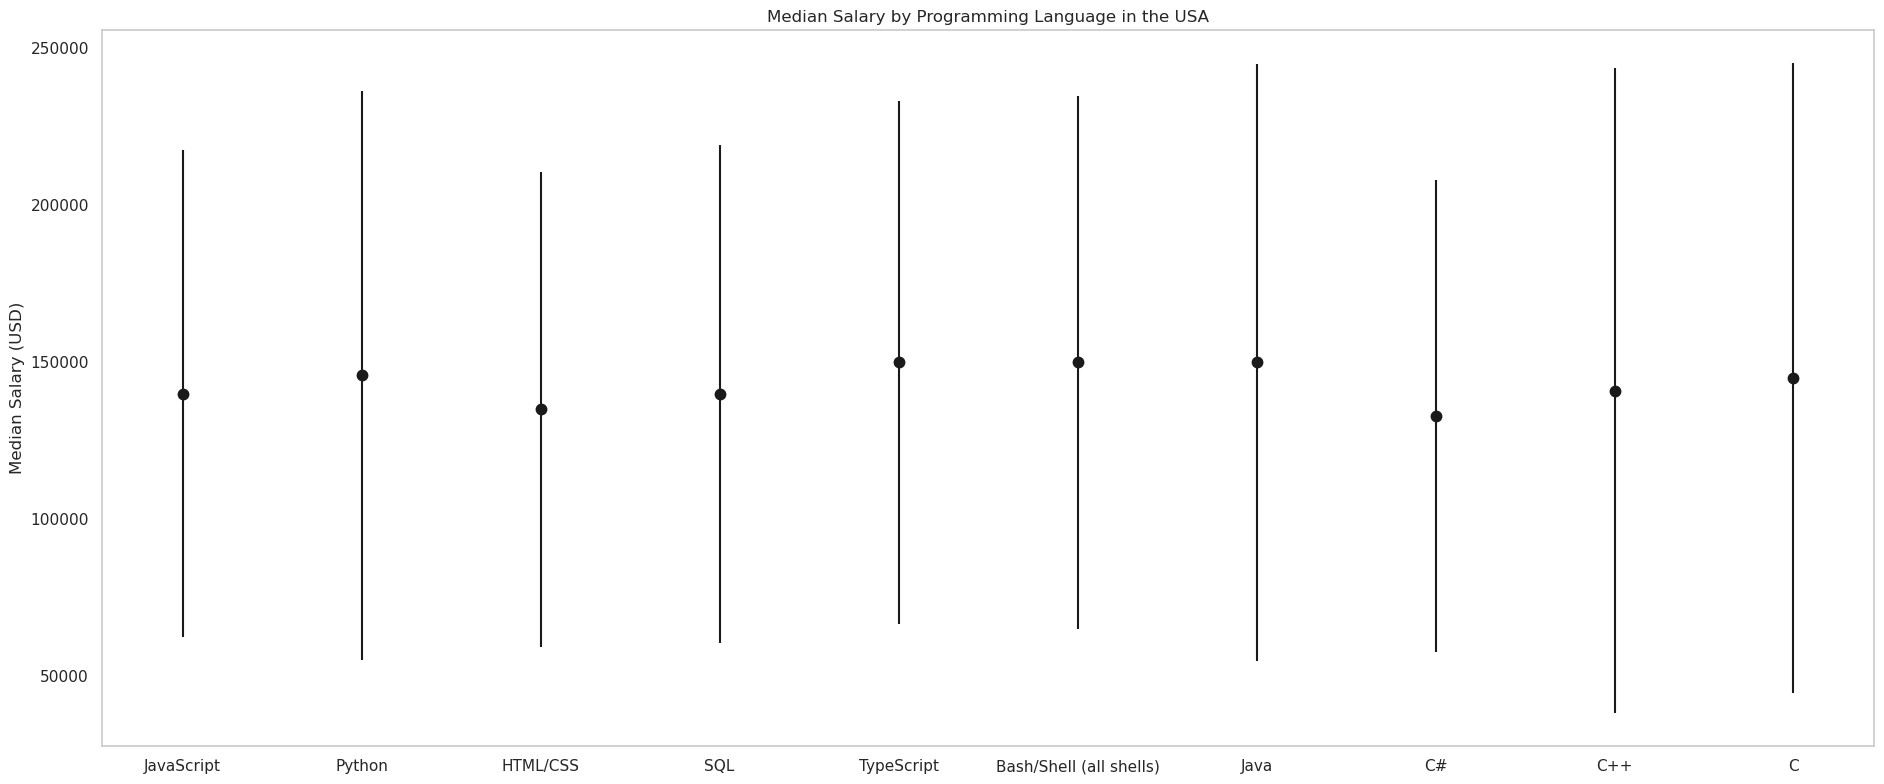

In [11]:
import statistical_tests as stat_test
stat_test.plot_language_vs_salary(df)

In [17]:
#One way anova to compare the mean of salary distributuon of people using a given 
#language. NOTE: People USE more than one LANGUAGE almost alwaya
#TIME FOR SOME STATISTICAL TESTS

stat_test.anova_one_way(df, 'C', 'C++') #Insignificant 
stat_test.anova_one_way(df, 'Python', 'JavaScript') #Significant difference

Top 10 used languages are
Index(['JavaScript', 'Python', 'HTML/CSS', 'SQL', 'TypeScript',
       'Bash/Shell (all shells)', 'Java', 'C#', 'C++', 'C'],
      dtype='object', name='LanguageUsed')
++++++++++++++++++++++++++++++++++++++++++++++
Statistically IN-significant difference of salary found for C and C++. P value is  0.632435
+++++++++++++++++++++++++++++++++++++++++++++++
Top 10 used languages are
Index(['JavaScript', 'Python', 'HTML/CSS', 'SQL', 'TypeScript',
       'Bash/Shell (all shells)', 'Java', 'C#', 'C++', 'C'],
      dtype='object', name='LanguageUsed')
++++++++++++++++++++++++++++++++++++++++++++++
Statistically significant difference of salary found for Python and JavaScript. P value is  0.000003
+++++++++++++++++++++++++++++++++++++++++++++++


In [13]:
#check for a statistically significant association between developer age and binned salary categories
#using chi-square test of independence
stat_test.chi_independence(df, 1)

Chi-Squared Statistic: 990.3317987494472
P-Value: 1.5909484920008978e-201
There is a statistically significant association between salary category and age category.


In [16]:
# T test to compare the the statistical similarity of mean age of 2 countries
stat_test.t_test(df, 'Germany', 'USA')  #Difference found
stat_test.t_test(df, 'USA', 'UK')   #No difference 
stat_test.t_test(df, 'France', 'Germany')  #No difference 

P-Value: 1.0122157390690648e-64
There is a statistically significant difference in age distribution of devs in Germany and USA
P-Value: 0.28765622014579534
There is no statistically significant difference in age distribution of devs in USA and UK
P-Value: 0.30001056161529827
There is no statistically significant difference in age distribution of devs in France and Germany


In [18]:
#Can we predict salary of devs in USA using ML (GradientBoostingRegressor) ? 

In [21]:
import salary_prediction_ML as prediction
#Load the the data and then engieer feautues for the ML algorithm 
df, df_scheme = eda.load_and_preprocess()
X, y = prediction.engineer_features(df)

In [22]:
model, X_test = prediction.train_and_evaluate_model(X, y)

Training Gradient Boosting model...
 Model Evaluation Results 
Root Mean Squared Error : $64,592.58
R-squared: 0.29


In [23]:
#Not too shabby considering we did not take geography into account (But probably a better model is possible)
#Salaries can vary by ~USD 30-40k in USA simply depending on geography. 

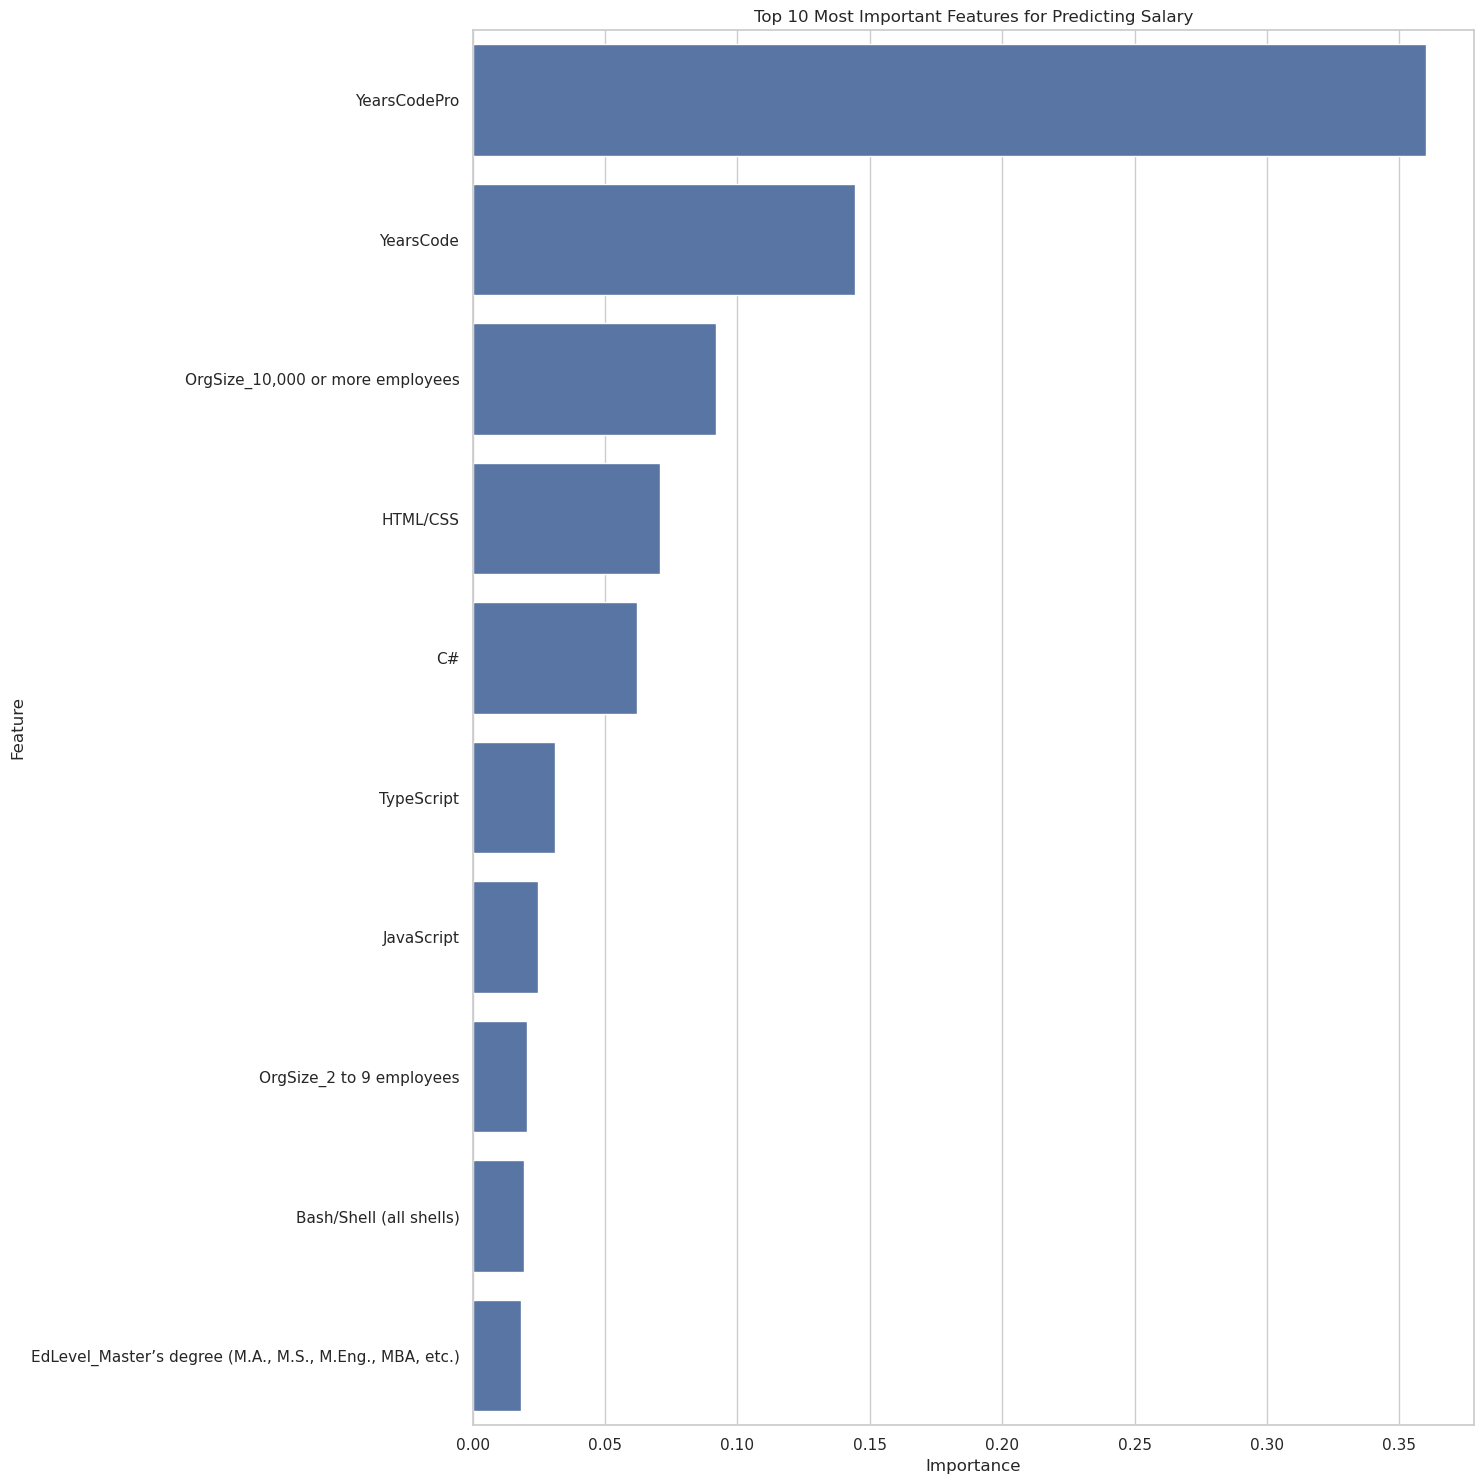

In [25]:
prediction.interpret_model(model, X_test)

In [ ]:
'''
Conclusion:

The developer population is largely concentrated in the 25-44 age range and in USA
There is a statistically significant relationship between age and salary.
Mean developer age of France and Germany are same while that of USA and UK are same. 
Devs using C vs C++ have same mean salary while those using Python vs Javascript do not
Years of professional experience is, unsurprisingly, the single most important predictor of salary in the US.
AND MANY MORE
'''